In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt

---
# Random Search Solver for 2D Poisson’s Equation

**Task 4 (Zadanie4/5):**  
Minimize the functional  

$S[u] = -\int \bigl(\tfrac{1}{2}\,u\,\nabla^2 u + \rho\,u\bigr)\,dA$
by randomly perturbing the potential on a grid.

- Propose updates $u_{i,j}\gets u_{i,j}+\delta$ with $\delta\sim U(-r,r)$, $U$- continous uniform distribution.  
- For each interior grid point, accept the update only if the local contribution $S_{\rm loc}(i,j)$ decreases.  
- Choose $r$ experimentally to balance step size and acceptance rate.  
- In each iteration, sweep through all points sequentially.

The class **`PoissonSolver5`**  from `poison2dslover.py`implements exactly this approach.  


In [2]:
from poison2dsolver import PoissonSolver5

PS = PoissonSolver5(r=0.5, max_probes=5)
iterations = 500
S_array = np.zeros(iterations)
for i in range(iterations):
    S_array[i] = PS.s_conv()
    PS.update()

In [3]:
#load results from tasks 1 and 2
s_array_1 = np.load('S_array_1.npy')
s_array_2 = np.load('S_array_2.npy')

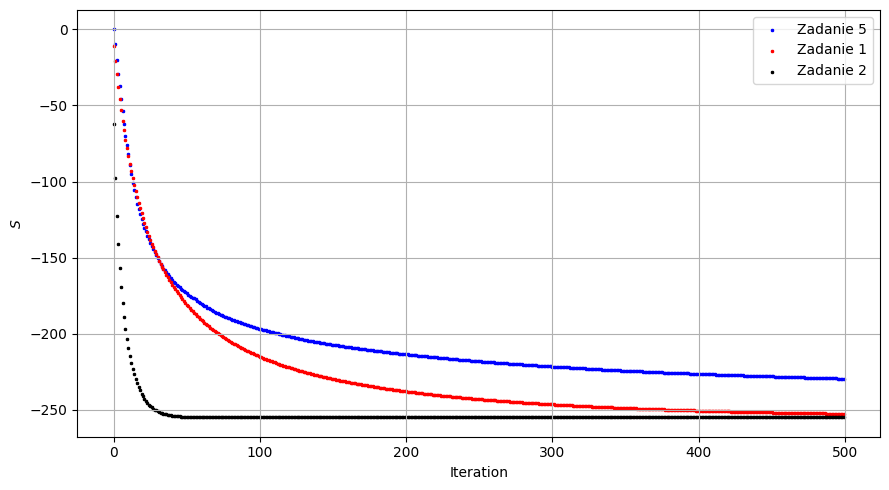

In [4]:
plt.figure(figsize=(9,5))
plt.scatter(np.arange(iterations), S_array, label='Zadanie 5', s=3, marker='x', c='blue')
plt.scatter(np.arange(iterations), s_array_1, label='Zadanie 1', s=3, marker='x', c='red')
plt.scatter(np.arange(iterations), s_array_2, label='Zadanie 2', s=3, marker='x', c='black')
plt.xlabel('Iteration')
plt.ylabel(r'$S$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

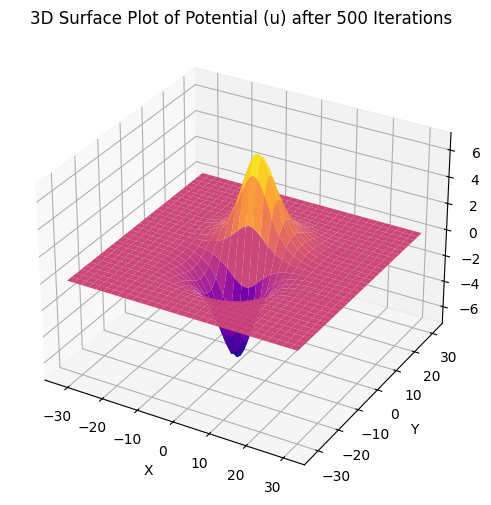

In [5]:
from matplotlib import colors

# Setting a consistent normalization for both plots
norm = colors.TwoSlopeNorm(vmin=-np.max(PS.u_grid), vcenter=0, vmax=np.max(PS.u_grid))


#Plot the u_grid after 500 iterations
x = np.linspace(-PS.size//2, PS.size//2, PS.size)
y = np.linspace(-PS.size//2, PS.size//2, PS.size)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, PS.u_grid, cmap='plasma', edgecolor='none', norm=norm)
ax.set_title(f'3D Surface Plot of Potential (u) after {PS.nr_iterations} Iterations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential (u)')
plt.show()